In [2]:
import os
if 'COLAB_TPU_ADDR' not in os.environ: 
  print('Not connected to TPU') 
else: 
  print("Connected to TPU")

Not connected to TPU


In [3]:
from google.colab import files
uploaded = files.upload()

Saving 1.csv to 1.csv


In [0]:
import pandas as pd
import io
train = pd.read_csv(io.StringIO(uploaded['1.csv'].decode('utf-8')))
#print(df)
#print(df.head(4))

In [5]:
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

User uploaded file "1.csv" with length 1965960 bytes


In [0]:
#uploaded
# To determine which version you're using:
#!pip show tensorflow

# For the current version: 
#!pip install --upgrade tensorflow

In [7]:
import numpy as np
import pandas as pd
import requests
import os

dress_patterns_df = pd.read_csv('1.csv')
dress_patterns = dress_patterns_df .values

# category
category = set(dress_patterns_df['category'])
print(category)

{'geometry', 'plain', 'ikat', 'chevron', 'animal', 'stripes', 'polka dot', 'floral', 'squares', 'stars', 'OTHER', 'cartoon', 'tribal', 'skull', 'houndstooth', 'letter_numb', 'scales'}


In [8]:
#create a folder dataset and nested folder of category
print(os.listdir())
os.mkdir('dataset_category')

for cat in category:
    print(cat)
    os.mkdir('dataset_category/'+cat)

print(os.listdir('dataset_category'))

['.config', '1.csv', 'sample_data']
geometry
plain
ikat
chevron
animal
stripes
polka dot
floral
squares
stars
OTHER
cartoon
tribal
skull
houndstooth
letter_numb
scales
['ikat', 'skull', 'letter_numb', 'polka dot', 'stars', 'chevron', 'OTHER', 'animal', 'squares', 'scales', 'cartoon', 'geometry', 'floral', 'plain', 'stripes', 'houndstooth', 'tribal']


In [9]:
# save image in respective category folder.

for i in range(len(dress_patterns)):
  if i%5 == 0:
    print(i, '/', len(dress_patterns))
  pattern = dress_patterns[i]
  url = pattern[3]
  unit_id = pattern[0]
  category = pattern[1]
  try:
    r = requests.get(url, allow_redirects=True)
    open('dataset_category/'+category+'/'+str(unit_id)+'.jpg', 'wb').write(r.content)
  except:
    print('ERROR at: ', i)

0 / 15702
5 / 15702
10 / 15702
15 / 15702
20 / 15702
25 / 15702
30 / 15702
35 / 15702
40 / 15702
45 / 15702
50 / 15702
55 / 15702
60 / 15702
65 / 15702
70 / 15702
75 / 15702
80 / 15702
85 / 15702
90 / 15702
95 / 15702
100 / 15702
105 / 15702
110 / 15702
115 / 15702
120 / 15702
125 / 15702
130 / 15702
135 / 15702
140 / 15702
145 / 15702
150 / 15702
155 / 15702
160 / 15702
165 / 15702
170 / 15702
175 / 15702
180 / 15702
185 / 15702
190 / 15702
195 / 15702
200 / 15702
205 / 15702
210 / 15702
215 / 15702
220 / 15702
225 / 15702
230 / 15702
235 / 15702
240 / 15702
245 / 15702
250 / 15702
255 / 15702
260 / 15702
265 / 15702
270 / 15702
275 / 15702
280 / 15702
285 / 15702
290 / 15702
295 / 15702
300 / 15702
305 / 15702
310 / 15702
315 / 15702
320 / 15702
325 / 15702
330 / 15702
335 / 15702
340 / 15702
345 / 15702
350 / 15702
355 / 15702
360 / 15702
365 / 15702
370 / 15702
375 / 15702
380 / 15702
385 / 15702
390 / 15702
395 / 15702
400 / 15702
405 / 15702
410 / 15702
415 / 15702
420 / 15702
42

In [0]:
# Importing the Keras libraries and packages
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

In [5]:
dress_patterns_df = pd.read_csv('1.csv')
dress_patterns = dress_patterns_df.values
dress_patterns_df.head()

,_unit_id,category,category:confidence,image_url
0,851505458,ikat,0.3487,http://s3-eu-west-1.amazonaws.com/we-attribute...
1,851505459,plain,1.0000,http://s3-eu-west-1.amazonaws.com/we-attribute...
2,851505460,polka dot,0.6709,http://s3-eu-west-1.amazonaws.com/we-attribute...
3,851505461,plain,1.0000,http://s3-eu-west-1.amazonaws.com/we-attribute...
4,851505462,geometry,0.7035,http://s3-eu-west-1.amazonaws.com/we-attribute...


In [6]:
print(os.listdir('dataset_category'))
print(os.listdir('dataset_category/animal'))

['ikat', 'skull', 'letter_numb', 'polka dot', 'stars', 'chevron', 'OTHER', 'animal', 'squares', 'scales', 'cartoon', 'geometry', 'floral', 'plain', 'stripes', 'houndstooth', 'tribal']
['851519746.jpg', '851517219.jpg', '851518798.jpg', '851519517.jpg', '851518427.jpg', '851514212.jpg', '851519658.jpg', '851512427.jpg', '851521101.jpg', '851507680.jpg', '851509300.jpg', '851507220.jpg', '851505510.jpg', '851515728.jpg', '851508682.jpg', '851508475.jpg', '851520850.jpg', '851509039.jpg', '851513812.jpg', '851517530.jpg', '851519229.jpg', '851511808.jpg', '851516161.jpg', '851518912.jpg', '851512064.jpg', '851519357.jpg', '851520705.jpg', '851520634.jpg', '851510944.jpg', '851510626.jpg', '851519780.jpg', '851508076.jpg', '851512532.jpg', '851516595.jpg', '851511588.jpg', '851505967.jpg', '851512413.jpg', '851505905.jpg', '851513083.jpg', '851513380.jpg', '851518942.jpg', '851510509.jpg', '851516879.jpg', '851508661.jpg', '851520226.jpg', '851507105.jpg', '851510744.jpg', '851509185.jpg',

In [0]:

classifier = Sequential()

classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

classifier.add(MaxPooling2D(pool_size = (2, 2)))

classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

classifier.add(Flatten())

classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 17, activation = 'softmax'))


classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
#classifier.summary()


In [9]:
# Part 2 - Fitting the CNN to the images

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('dataset_category',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')


Found 15702 images belonging to 17 classes.


In [11]:
classifier.fit_generator(training_set,
                         steps_per_epoch = 80,
                         epochs = 5)

Epoch 1/5
80/80 [==============================] - 32s 404ms/step - loss: 0.1537 - acc: 0.9437
Epoch 2/5
80/80 [==============================] - 33s 407ms/step - loss: 0.1463 - acc: 0.9477
Epoch 3/5
80/80 [==============================] - 34s 422ms/step - loss: 0.1441 - acc: 0.9480
Epoch 4/5
80/80 [==============================] - 35s 437ms/step - loss: 0.1404 - acc: 0.9525
Epoch 5/5
80/80 [==============================] - 35s 439ms/step - loss: 0.1369 - acc: 0.9538


In [12]:
# Save Model to Disk
# serialize model to JSON
model_json = classifier.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
classifier.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [13]:
os.listdir('dataset_category/floral')

['851519961.jpg',
 '851512076.jpg',
 '851507862.jpg',
 '851509585.jpg',
 '851511192.jpg',
 '851514434.jpg',
 '851508215.jpg',
 '851519934.jpg',
 '851506014.jpg',
 '851517049.jpg',
 '851514175.jpg',
 '851510175.jpg',
 '851515589.jpg',
 '851505674.jpg',
 '851519137.jpg',
 '851512652.jpg',
 '851515813.jpg',
 '851507234.jpg',
 '851506230.jpg',
 '851520324.jpg',
 '851511345.jpg',
 '851516344.jpg',
 '851515937.jpg',
 '851518318.jpg',
 '851507318.jpg',
 '851517476.jpg',
 '851514649.jpg',
 '851512022.jpg',
 '851514723.jpg',
 '851511279.jpg',
 '851516573.jpg',
 '851508625.jpg',
 '851511527.jpg',
 '851509042.jpg',
 '851519394.jpg',
 '851507185.jpg',
 '851506782.jpg',
 '851521646.jpg',
 '851511991.jpg',
 '851521207.jpg',
 '851511017.jpg',
 '851510579.jpg',
 '851514625.jpg',
 '851511666.jpg',
 '851513696.jpg',
 '851513868.jpg',
 '851507470.jpg',
 '851512513.jpg',
 '851507245.jpg',
 '851514282.jpg',
 '851513364.jpg',
 '851519851.jpg',
 '851513803.jpg',
 '851516323.jpg',
 '851516289.jpg',
 '85151597

In [14]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('dataset_category/floral/851514376.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)
training_set.class_indices

{'OTHER': 0,
 'animal': 1,
 'cartoon': 2,
 'chevron': 3,
 'floral': 4,
 'geometry': 5,
 'houndstooth': 6,
 'ikat': 7,
 'letter_numb': 8,
 'plain': 9,
 'polka dot': 10,
 'scales': 11,
 'skull': 12,
 'squares': 13,
 'stars': 14,
 'stripes': 15,
 'tribal': 16}

In [18]:
index = np.where(result[0] == 1)[0][0]
predicted_category = list(training_set.class_indices.keys())[list(training_set.class_indices.values()).index(index)]
predicted_category

'floral'

In [19]:
path = 'dataset_category/'+ predicted_category+'/'
extension = '*.jpg'
path+extension

'dataset_category/floral/*.jpg'

In [20]:
result = [i for i in glob.glob(path+extension)]
len(result)  

2776

In [21]:
result[0]

'dataset_category/floral/851519961.jpg'

In [0]:
img = cv2.imread(result[0])

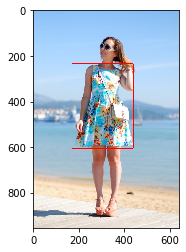

In [24]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

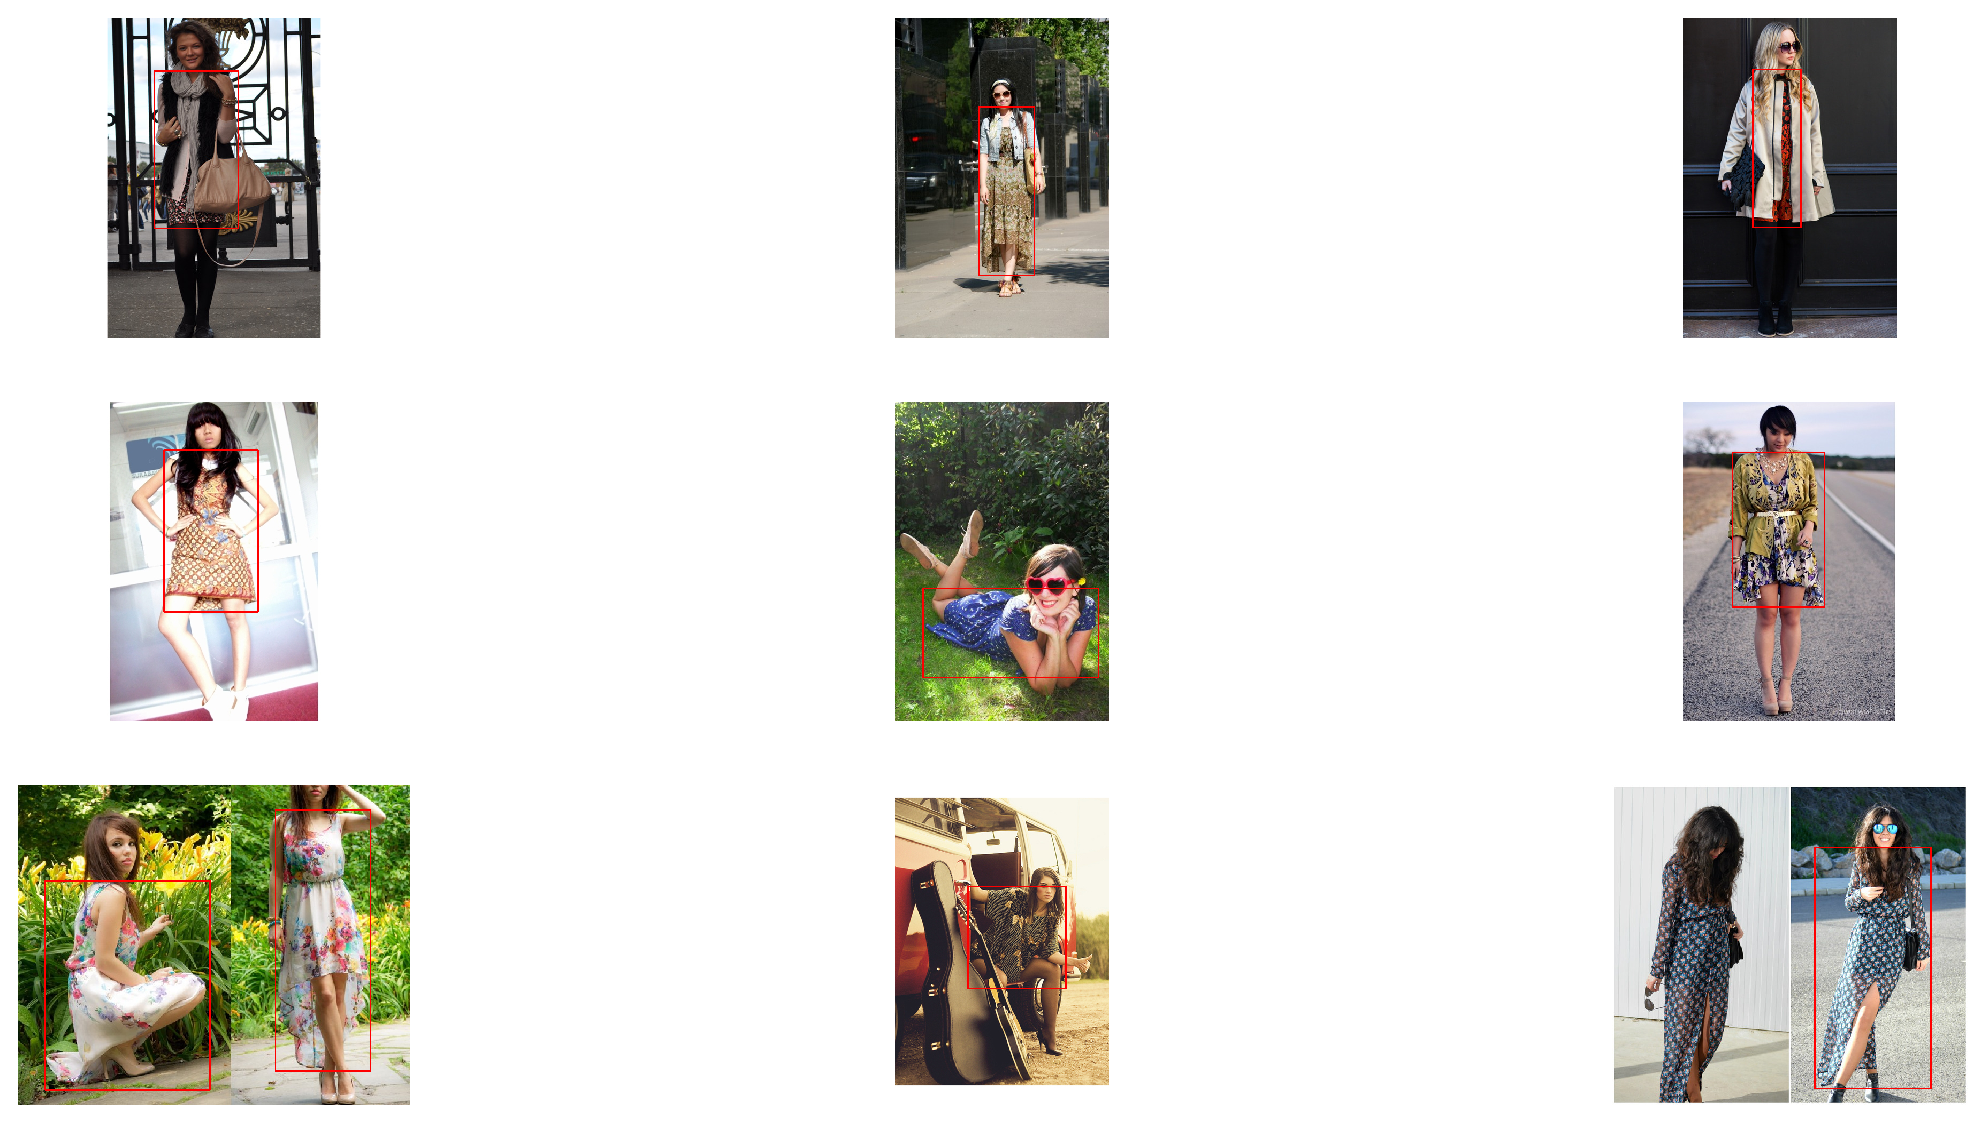

In [25]:
images = result[1:10]
from matplotlib.pyplot import figure
figure(num=None, figsize=(16, 8), dpi=180, facecolor='w', edgecolor='k')
for i, image in enumerate(images, start=1):
    image_array = cv2.imread(image)
    
    image_array = cv2.cvtColor(image_array, cv2.COLOR_BGR2RGB)
    plt.subplot(330+i)
    plt.axis('off')
    plt.imshow(image_array, cmap=plt.get_cmap('gray'))

plt.show()